In [111]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.cm as cm

from dendrons_pore import dendrons_pore
from create_in import create_in
from out_reader import out_reader

Параметры

In [112]:
Cs_range = [0.001, 0.003, 0.007]
chi = 0.5
alpha = 0.5
S = 150

D = 170
N = 300
q = 2

g_range = [0, 1, 2, 3]

Аналитическая теория

In [113]:
phi_dif_cs_g, generation = {}, {}
for g in g_range:
    phi_dif_cs = {}
    for cs in  Cs_range:
            N, n, theta, H_dendrons, r_in_dendrons, r_out_dendrons,\
                    psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, rho_dendrons = dendrons_pore(
                            Cs = cs,
                            #параметры щетки
                            alpha = alpha,
                            S = S,
                            
                            #параметры поры
                            D = D,
                            
                            #параметры дендрона
                            g = g,
                            q = q,
                            n_base = 1,
                            N_opt = N)
            
            phi_dif_cs[cs] = (r_in_dendrons, c_pol_dendrons)
            
    phi_dif_cs_g[g] = (phi_dif_cs)
    generation[g] = (n)

[165.63827253]
[141.8605757]
[112.35114124]
[151.27685845]
[123.31196626]
[98.65172781]
[120.56130603]
[99.38434003]
[80.75085894]
[92.1914257]
[77.44458526]
[64.04523169]


In [114]:
phi_dif_cs_g_SCF, ends_dif_cs_g_SCF, ends_leg_dif_cs_g_SCF = {}, {}, {}

for g, n in generation.items():
    
    # Определяем структуру в зависимости от поколения
    if g == 0:
        pol_structure = f'(P0)1(P){n-2}(E)1'
        print(f"Линейная цепочка {pol_structure=}")
    elif g == 1:
        pol_structure = f'(P0)1(P){n-2}(EL)1[(P){n-1}(E)1](P){n-1}(E)1'
        print(f"Первое поколение разветвленность 2 {pol_structure=}")
    elif g == 2:
        pol_structure = f'(P0)1(P){n-2}(EL)1[(P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1](P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1'
        print(f"Второе поколение разветвленность 2 {pol_structure=}")
    elif g == 3:
        pol_structure = f'(P0)1(P){n-2}(EL)1[(P){n-1}(E)1[(P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1](P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1](P){n-1}(E)1[(P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1](P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1'
        print(f"Третье поколение разветвленность 2 {pol_structure=}")
    else:
        print(f"Поколение {g} не обработано")
        continue
    
    phi_dif_cs_SCF, ends_dif_cs_SCF, ends_leg_dif_cs_SCF = {}, {}, {}
    for cs in Cs_range:
        # Генерируем имя файла и создаем SCF-инпут
        file_name_pro = create_in(
            template_pore='/home/tpopova/prj/PB_SCF/01_dendrone_pore/scf_templates/dendr_template.in',
            range_param='generation',
            min_val=0.1,
            max_val=0.1,
            Cs=cs,
            chi=chi,
            D=D,
            N=N,
            S=S,
            alpha=alpha,
            pol_structure=pol_structure  # Передаем структуру
        )

        # Парсим профили
        psi, phi_brush, phi_end_brush, phi_end_leg_brush = out_reader(file_names=file_name_pro)

        # Сохраняем результаты
        coord = np.arange(D)
        
        phi_dif_cs_SCF[cs] = (coord, phi_brush)
        ends_dif_cs_SCF[cs] = (coord, phi_end_brush)
        ends_leg_dif_cs_SCF[cs] = (coord, phi_end_leg_brush)
        
    phi_dif_cs_g_SCF[g] = (phi_dif_cs_SCF)
    ends_dif_cs_g_SCF[g] = (ends_dif_cs_SCF)
    ends_leg_dif_cs_g_SCF[g] = (ends_leg_dif_cs_SCF)

Линейная цепочка pol_structure='(P0)1(P)298(E)1'
Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.346877e+00 |g| = 6.372186e+00 alpha = 1.000000e+00 
hessian scaling: 1.46791
it =  1  E = 2.125040e+00 |g| = 5.746917e+00 alpha = 1.156932e-01 
it =  2  E = 2.676794e+00 |g| = 6.346211e+00 alpha = 7.598519e-02 
it =  3  E = 5.071854e+00 |g| = 6.012173e+00 alpha = 1.866957e-02 
it =  4  E = 1.204820e+01 |g| = 6.530211e+00 alpha = 3.824999e-03 
it =  5  E = 4.803579e+00 |g| = 6.876513e+00 alpha = 2.369485e-02 
it =  6  E = 1.364211e+01 |g| = 6.943607e+00 alpha = 3.170861e-03 
it =  7  E = 1.618405e+01 |g| = 6.940876e+00 alpha = 2.361857e-03 
it =  8  E = 2.780542e+01 |g| = 6.981695e+00 alpha = 7.656443e-04 
it =  9  E = 1.954144e+01 |g| = 6.939712e+00 alpha = 1.440294e-

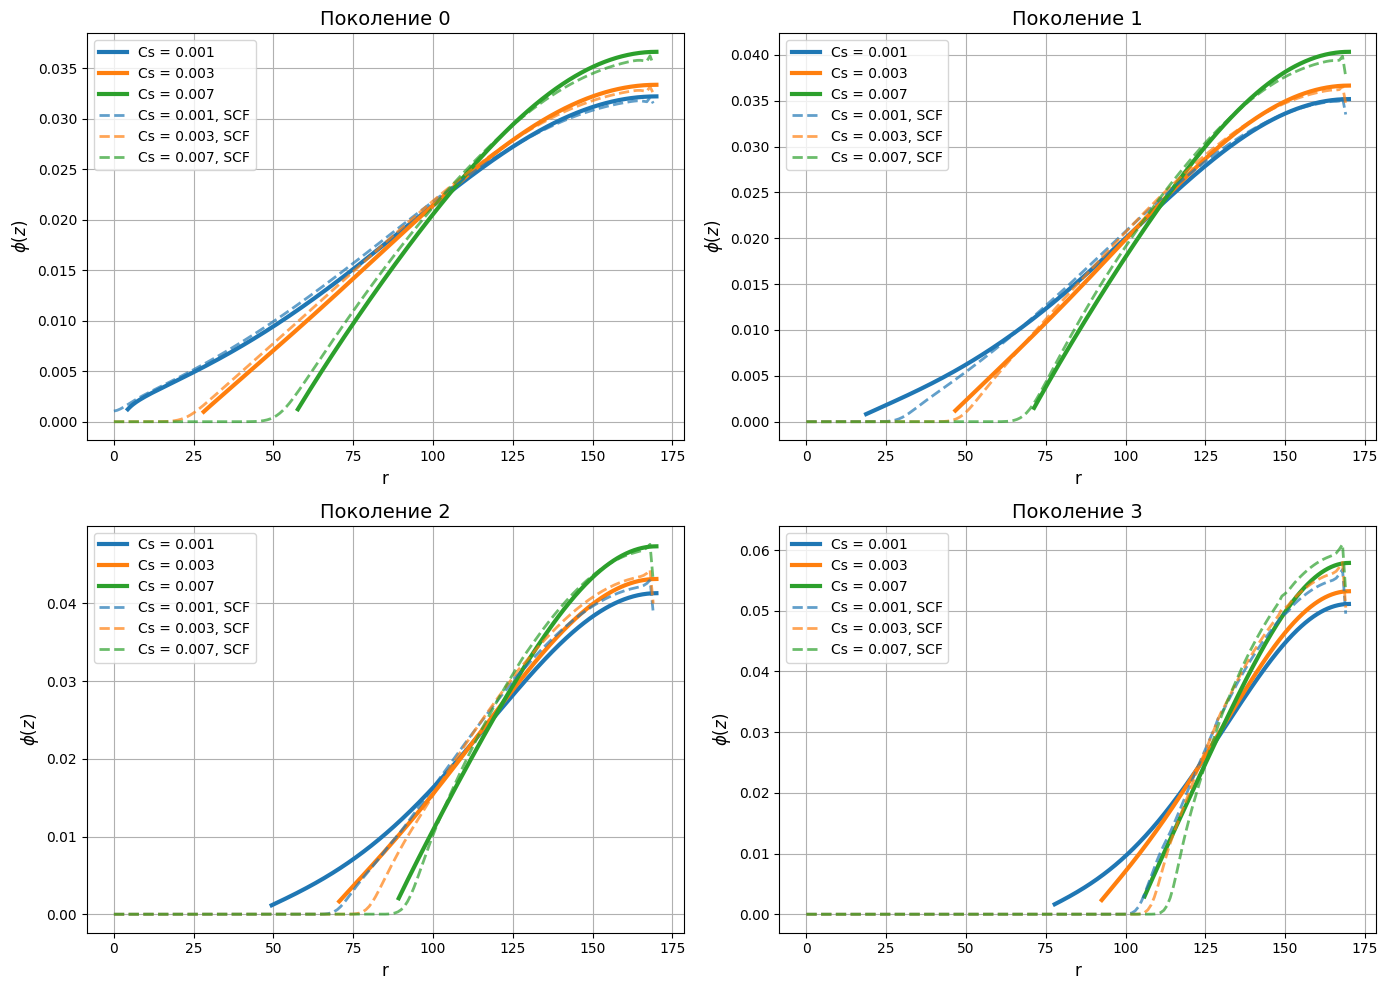

In [116]:
# Построение графиков
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 окна
axes = axes.flatten()  # Преобразование в 1D для удобства итерации

cs_values = sorted({cs for g in g_range for cs in phi_dif_cs_g[g].keys()})  # Уникальные значения Cs
color_map = {cs: cm.tab10(i % 10) for i, cs in enumerate(cs_values)}  # Сопоставляем цвет каждому Cs

for i, g in enumerate(g_range):
    ax = axes[i]
    phi_dif_cs = phi_dif_cs_g[g]
    phi_dif_cs_SCF = phi_dif_cs_g_SCF[g]

    for cs, (r, c_pol) in phi_dif_cs.items():
        color = color_map[cs]
        ax.plot(r, c_pol, label=f"Cs = {cs}", linewidth=3, color=color)
    
    for cs, (coord, phi_brush) in phi_dif_cs_SCF.items():
        color = color_map[cs]
        ax.plot(coord, phi_brush, label=f"Cs = {cs}, SCF", linewidth=2, linestyle = '--', alpha = 0.7, color=color)
    
    # ax.set_xlim(0, D+2)  # Установка диапазона оси X
    ax.set_title(f"Поколение {g}", fontsize=14)
    ax.set_xlabel("r", fontsize=12)
    ax.set_ylabel(r"$\phi(z)$", fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True)

# Настройка пространства между окнами
plt.tight_layout()
# plt.savefig('4_graphs_phi.pdf', dpi=300, bbox_inches='tight')
plt.show()